In [157]:
import cv2
import numpy as np
from glob import glob
from sklearn.cluster import MiniBatchKMeans
from IPython.display import Image
import matplotlib.pyplot as plt
# %matplotlib inline

In [4]:
filenames = [x for x in glob("../../data/fullpage_3k/image/*.png")]
print("got", len(filenames), "files")

('got', 1712, 'files')


0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575
1600
1625
1650
1675
1700
(1712, 90)


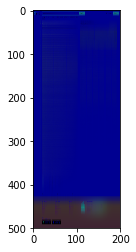

In [194]:
histograms = []
spectre = []
avg_screenshot = np.zeros((500, 200, 3), np.uint64)
N = 3000
for i, filename in enumerate(filenames[:N]):
    if i % 25 == 0:
        print(i)
    img_bgr = cv2.imread(filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    hist3 = np.hstack([hist.astype(np.float64) / np.sum(hist) for hist, bins in [np.histogram(img[..., c].ravel(), 30, [0,256]) for c in range(3)]])
    histograms.append(hist3)
    
    small_img = cv2.resize(img, (200, 500))
    avg_screenshot += small_img
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (400, 400))
    spectrum = np.fft.fft2(img)
    fshift = np.fft.fftshift(spectrum)
    magnitude_spectrum = np.log(np.abs(fshift))
    spectre.append(magnitude_spectrum)
    
    
    
avg_screenshot = (avg_screenshot / N).astype(np.uint8)
plt.imshow(avg_screenshot)
avg_screenshot = cv2.cvtColor(avg_screenshot, cv2.COLOR_HSV2BGR)
cv2.imwrite("mean_screenshot.jpg", avg_screenshot)

histograms = np.vstack(histograms)
spectre = np.dstack(spectre)
print(histograms.shape)

5645.188289972586


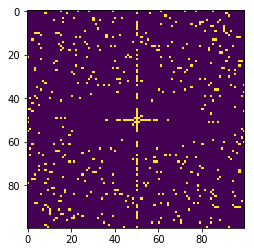

In [137]:
sd = np.std(spectre, axis=2)
sd[sd > np.percentile(sd, 5)] = 0
sd[sd > 0] = 1
plt.imshow(sd)
sp0 = spectre[..., 0]
sp1 = spectre[..., 1]
spdiff = np.abs(sp0 - sp1)
spdiff[sd < 1] = 0

827.6974107478351


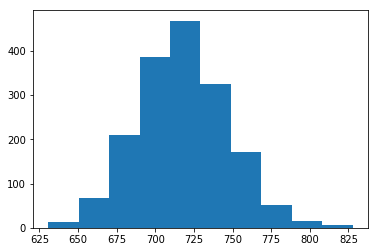

In [202]:
mean_spectre = np.median(spectre, axis=2)
sd = np.std(spectre - np.tile(mean_spectre[:, :, np.newaxis], (1, 1, spectre.shape[2])), axis=2)
sd[sd > np.percentile(sd, 1)] = 0
sd[sd > 0] = 1
sd = sd.astype(np.uint8)
# plt.imshow(sd)
diffs = []
for sp in np.rollaxis(spectre, 2):
    spdiff = np.abs(sp - mean_spectre)
    spdiff[sd == 0] = 0
    diffs.append(spdiff.sum())
diffs = np.array(diffs)
plt.hist(diffs)
print(np.max(diffs))
np.save("avg_spectre.npy", mean_spectre)
np.save("spectre_indices.npy", sd)

True

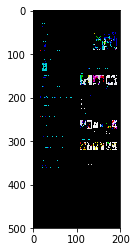

In [63]:
img = cv2.imread(filenames[0], cv2.IMREAD_COLOR)
img = cv2.resize(img, (200, 500))
img = cv2.absdiff(avg_screenshot, img)
img[img < 200] = 0
plt.imshow(img)
cv2.imwrite("diff.jpg", img)

8333.274147036731


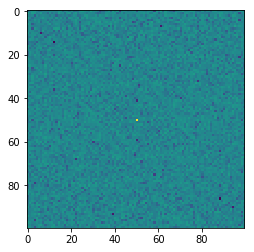

In [163]:
img = cv2.imread("img.png", cv2.IMREAD_GRAYSCALE)
img = 250 * np.random.rand(200, 200)
img = cv2.resize(img, (100, 100))
spectrum = np.fft.fft2(img)
fshift = np.fft.fftshift(spectrum)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum)
spdiff = np.abs(magnitude_spectrum - mean_spectre)
spdiff[sd < 1] = 0
print(spdiff.sum())
# cv2.imwrite("spec.jpg", magnitude_spectrum.astype(np.uint8))

In [203]:
# img = cv2.imread("/home/me/code/screenshots/repo/data/broken_imgs/good/https___yandex.ru_search_?text=mylittleponny.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("yandex.png", cv2.IMREAD_GRAYSCALE)
# img = img[:, 0:img.shape[1] // 2]
# img = cv2.resize(img, (img.shape[1] * 2, img.shape[0]))
# img[img.shape[0] - 2500:, :] = 0
# cv2.imwrite("bad_im.png", img)
img = cv2.resize(img, (400, 400))
spectrum = np.fft.fft2(img)
fshift = np.fft.fftshift(spectrum)
magnitude_spectrum = np.log(np.abs(fshift))
spdiff = np.abs(magnitude_spectrum - mean_spectre)
spdiff[sd < 1] = 0
print(spdiff.sum())


921.1170170859815


In [ ]:
img = cv2.imread(filenames[0], cv2.IMREAD_COLOR)
img = cv2.resize(img, (200, 500))
img = cv2.absdiff(avg_screenshot, img)
img[img < 200] = 0
plt.imshow(img)
cv2.imwrite("diff.jpg", img)

In [29]:
avg_hist = np.median(histograms, axis=0)
diff = np.abs(histograms - np.tile(avg_hist, (histograms.shape[0], 1)))
avg_diff = np.median(diff, axis=0)
percentile = 95
not_features = np.where(avg_diff > np.percentile(avg_diff, percentile) + 1e-6)[0]
print(np.where(avg_diff <= np.percentile(avg_diff, percentile) + 1e-6)[0])
diff[:, not_features] = 0
for i, diff_row in enumerate(diff):
    dist = np.dot(diff_row, diff_row)
    print(dist)

[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88]
0.0006680334190692851
0.0009001417412433414
0.00018329429236125892
7.393976991251666e-05
0.0003459767983723614
0.0003155335936068251
0.000139287572753549
6.054242333570005e-05
0.0006613015671006789
0.00040922153397968553
9.42170536326162e-05
0.0009276726594136025
0.0004634358866705772
0.0011259652452143983
4.775247882533433e-05
0.00017580434234930334
0.0005384139586901096
0.0003123946565769223
0.00019325019094512395
0.0010061700432086066
0.00044452706506488063
0.0004222804233378876
5.470505614218713e-05
9.16672189162464e-05
0.0013771863213967875
0.00047942382571266435
7.072516087933794e-05
0.002563168710397103
0.000617474524275483
0.00034076930789027105
0.0002680345314932811
0.000317377321757035
0.0021347689608814373
9.80377258484

In [38]:
kmeans = MiniBatchKMeans(200)
labels = kmeans.fit_predict(histograms)
centroids = kmeans.cluster_centers_

In [39]:
def find_min_dist(hist, avg_hists):
    min_dist = 1e7
    for c in avg_hists:
        diff = hist - c
        diff[not_features] = 0
        dist = np.dot(diff, diff)
        if dist < min_dist:
            min_dist = dist
    return min_dist

max_dist = -1e7
for hist in histograms:
    dist = find_min_dist(hist, centroids)
    if dist > max_dist:
        max_dist= dist
print(max_dist)

0.0002982471850265566


In [44]:
img = 255 * np.ones((500, 500, 3), np.uint8)
img[..., 0] = 100
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist3 = np.hstack([hist.astype(np.float64) / np.sum(hist) for hist, bins in [np.histogram(img[..., c].ravel(), 30, [0,256]) for c in range(3)]])
dist = find_min_dist(hist3, centroids)
print(dist)

1.9855913111467944
